In [ ]:
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# (60000, 28, 28, 1)
# (60000, 1, 28, 28)

In [ ]:
import keras.backend as K

In [ ]:
img_size = X_train.shape[1]
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_size, img_size)
    X_test = X_test.reshape(X_test.shape[0], 1, img_size, img_size)
else:
    X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
    X_test = X_test.reshape(X_test.shape[0], img_size, img_size, 1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_train = X_train / 255

In [ ]:
X_test = X_test / 255

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0]

5

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
input_shape = X_train.shape[1:]
input_shape

(28, 28, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 0.4429 - accuracy: 0.8621 - val_loss: 0.0839 - val_accuracy: 0.9740
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1614 - accuracy: 0.9515 - val_loss: 0.0653 - val_accuracy: 0.9803
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1218 - accuracy: 0.9644 - val_loss: 0.0531 - val_accuracy: 0.9839
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1020 - accuracy: 0.9701 - val_loss: 0.0442 - val_accuracy: 0.9867
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0900 - accuracy: 0.9736 - val_loss: 0.0418 - val_accuracy: 0.9872
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0771 - accuracy: 0.9774 - val_loss: 0.0428 - val_accuracy: 0.9864
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0711 - accuracy: 0.9789 - val_loss: 0.0394 - val_accuracy: 0.9882

In [ ]:
from matplotlib import pyplot as plt

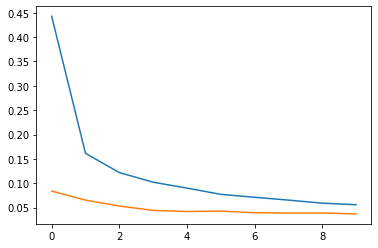

In [ ]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

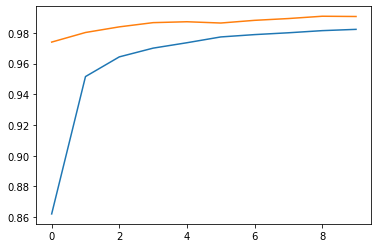

In [ ]:
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0264 - accuracy: 0.9911


[0.026438040658831596, 0.991100013256073]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)

confusion_matrix(y_true, y_pred)

array([[ 978,    0,    0,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1132,    3,    0,    0,    0,    0,    0,    0,    0],
       [   2,    0, 1028,    0,    1,    0,    0,    1,    0,    0],
       [   0,    0,    3, 1000,    0,    4,    0,    1,    1,    1],
       [   0,    0,    0,    0,  978,    0,    0,    0,    0,    4],
       [   2,    0,    0,    2,    0,  883,    3,    0,    0,    2],
       [   5,    2,    0,    0,    4,    4,  943,    0,    0,    0],
       [   0,    1,    4,    0,    0,    0,    0, 1022,    1,    0],
       [   4,    0,    4,    1,    3,    1,    0,    2,  954,    5],
       [   2,    2,    0,    0,    5,    3,    0,    3,    1,  993]])

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# def model_za_kriminalce(slika):
#     return 0

In [ ]:
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

68616192/68606236 [==============================] - 2s 0us/step
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
